# Bibliotecas

In [216]:
# ETL
import pandas as pd
import numpy as np

# Visualização
import plotly.express as px
import plotly.io as pio
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.plotting import plot_decision_regions

# Regressão e métricas
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score 
from sklearn.metrics import precision_score, recall_score,classification_report, roc_auc_score

from sklearn.tree import DecisionTreeClassifier, plot_tree

# Treino/teste
from sklearn.model_selection import train_test_split


# Temas
sns.set()
pio.templates.default = 'plotly_white'

In [217]:
test = pd.read_csv('test.csv') # Dataset para o teste
gender = pd.read_csv('gender_submission.csv')
df = pd.read_csv('titanic.csv') # Dataset para treino e validação

# Colunas auxiliares
df['Survived2'] = df['Survived'].map({0: 'Dead', 1:'Survived'})
df['Class'] = df['Pclass'].map({1: 'First Class', 2:'Second Class', 3: 'Third Class'})
df['Sex2'] = df['Sex'].map({'male': 0, 'female': 1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived2,Class,Sex2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Dead,Third Class,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived,First Class,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived,Third Class,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived,First Class,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Dead,Third Class,0


# Análise Exploratoria dos Dados

In [218]:
# Por onde embarcou x sobrevivencia
pd.crosstab(df['Embarked'], df['Survived'].map({0:'Dead', 1:'Suvived'}))

Survived,Dead,Suvived
Embarked,,
C,75,93
Q,47,30
S,427,217


In [219]:
# Sexo x sobrevivência
pd.crosstab(df['Sex'], df['Survived'].map({0:'Dead', 1:'Suvived'}))

Survived,Dead,Suvived
Sex,,
female,81,233
male,468,109


In [220]:
# Idade x sobrevivência
df_age_dead_surv = pd.crosstab(pd.cut(df['Age'], bins = [0,2,5,10,20,30,40,50,60,70,80,90,100]), df['Survived'].map({0:'Dead', 1:'Suvived'}))
df_age_dead_surv

Survived,Dead,Suvived
Age,,
"(0, 2]",9,15
"(2, 5]",4,16
"(5, 10]",13,7
"(10, 20]",71,44
"(20, 30]",146,84
"(30, 40]",86,69
"(40, 50]",53,33
"(50, 60]",25,17
"(60, 70]",13,4


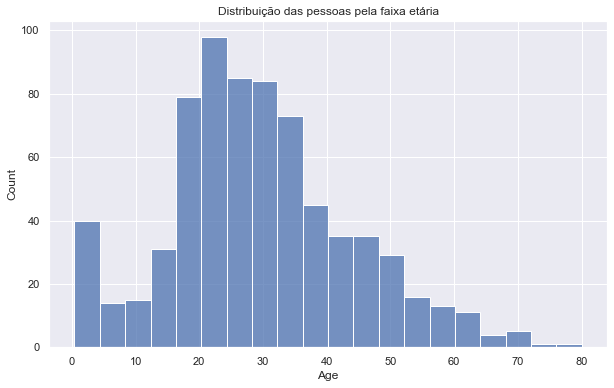

Idade média: 29.70
Idade mediana: 28.00
      


In [221]:
# Pessoas por idade
plt.figure(figsize=(10,6))
sns.histplot(df, x = df['Age'])
plt.title('Distribuição das pessoas pela faixa etária')
plt.show()

#mean_age,median_age (29.69911764705882, 28.0) -> Assimetrica a direita
mean_age = df['Age'].mean()
median_age = df['Age'].median()
df['Age'].median()

print(f'''Idade média: {mean_age:.2f}
Idade mediana: {median_age:.2f}
      ''')

A partir do Gráfico acima, podemos observar a distribuição assimétrica à direita referente à variável idade.

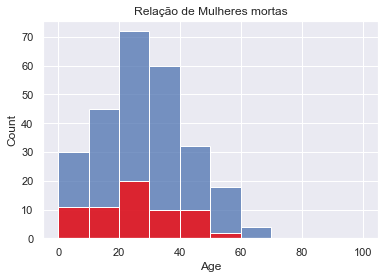

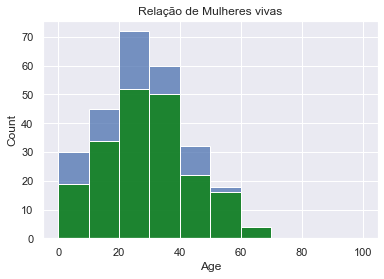

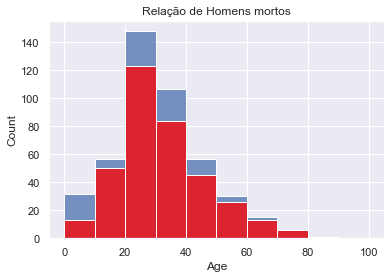

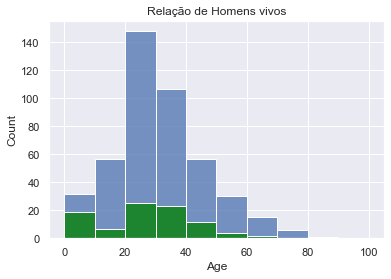

In [222]:
k = [i for i in range(0, 110,10)]

sns.histplot(df.query('Sex == "female"'), x = df.query('Sex == "female"')['Age'], bins = k)
sns.histplot(df.query('Sex == "female" and Survived == 0'), x = df.query('Sex == "female" and Survived == 0')['Age'], bins = k,color = 'red').set(title = 'Relação de Mulheres mortas')
plt.show()

sns.histplot(df.query('Sex == "female"'), x = df.query('Sex == "female"')['Age'], bins = k)
sns.histplot(df.query('Sex == "female" and Survived == 1'), x = df.query('Sex == "female" and Survived == 1')['Age'], bins = k,color = 'green').set(title = 'Relação de Mulheres vivas')
plt.show()

sns.histplot(df.query('Sex == "male"'), x = df.query('Sex == "male"')['Age'], bins = k)
sns.histplot(df.query('Sex == "male" and Survived == 0'), x = df.query('Sex == "male" and Survived == 0')['Age'], bins = k, color = 'red').set(title = 'Relação de Homens mortos')
plt.show()

sns.histplot(df.query('Sex == "male"'), x = df.query('Sex == "male"')['Age'], bins = k)
sns.histplot(df.query('Sex == "male" and Survived == 1'), x = df.query('Sex == "male" and Survived == 1')['Age'], bins = k, color = 'green').set(title = 'Relação de Homens vivos')
plt.show()

In [223]:
# Regra de Sturges
k = 1 + 3.3 * np.log(len(df[df['Survived'] == 1]))
k = round(k)
k

20

In [224]:
fig = px.histogram(data_frame = df[df['Survived'] == 1], x = 'Age', y = 'Survived', color = 'Sex', 
             title = 'Distribuição dos sobreviventes por idade para ambos os sexos',
             color_discrete_map={'male': 'blue',
                                 'female': 'rgb(102,197,204)'},
             nbins = k)

fig.update_layout(bargap=0.30)

In [225]:
# Plotly application for interactive visualization 

fig = px.sunburst(data_frame=df, # Our dataset
                  path=["Class", "Sex", "Survived2"],  # Root, Branches, Leaves
                  width=700, height=600,
                  color="Class",
                  color_discrete_map={'First Class': 'rgb(246,207,113)',
                                      'Second Class': 'rgb(248,156,116)',
                                      'Third Class': 'rgb(102,197,204)'},  # Colours (could be changed easily)
                  maxdepth=-1,
                  branchvalues='total',
                  hover_name='Class',  # Hover name for chosen column
                  hover_data={'Class': False},
                  title='Percentual de mortes dos homens e mulheres de cada classe', template='ggplot2'# Title and the template 
                  )

fig.update_traces(textinfo='label+percent parent')
fig.update_layout(font=dict(size=15))
fig.show()

<img src="Sunburst_titanic.png" />

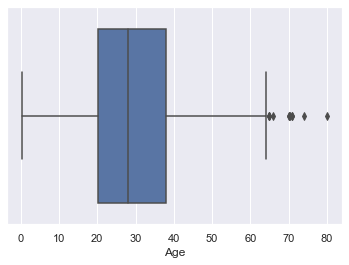



q1: 20.125 (0 a 25% da pop.)
q2: 28.0 (até 50% da pop. mediana)
q3: 38.0 (até 75% da pop.)
iqr: 17.875
mínimo: -6.6875
máximo: 64.8125

qnt_outliers: 11

Outliers:       Age                                  Name
33   66.0                 Wheadon, Mr. Edward H
54   65.0        Ostby, Mr. Engelhart Cornelius
96   71.0             Goldschmidt, Mr. George B
116  70.5                  Connors, Mr. Patrick
280  65.0                      Duane, Mr. Frank
456  65.0             Millet, Mr. Francis Davis
493  71.0               Artagaveytia, Mr. Ramon
630  80.0  Barkworth, Mr. Algernon Henry Wilson
672  70.0           Mitchell, Mr. Henry Michael
745  70.0          Crosby, Capt. Edward Gifford
851  74.0                   Svensson, Mr. Johan




In [226]:
titanic = df

q1 = titanic['Age'].quantile(q = 0.25)
q2 = titanic['Age'].quantile(q = 0.5)
q3 = titanic['Age'].quantile(q = 0.75)

iqr = q3 - q1 

minimo = q1 - 1.5 * iqr 
maximo = q3 + 1.5 * iqr

# outlier
num_outliers = len(titanic[titanic['Age'] > maximo])
dict_outliers = titanic[titanic['Age'] > maximo][['Age', 'Name']]

sns.boxplot(data = titanic, x = 'Age')
plt.show()

print(f'''

q1: {q1} (0 a 25% da pop.)
q2: {q2} (até 50% da pop. mediana)
q3: {q3} (até 75% da pop.)
iqr: {iqr}
mínimo: {minimo}
máximo: {maximo}

qnt_outliers: {num_outliers}

Outliers: {dict_outliers}

''')


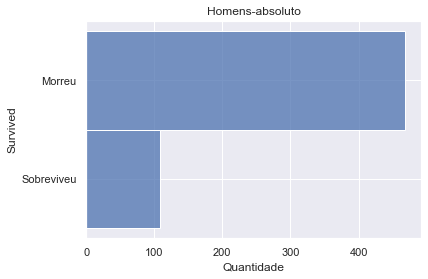

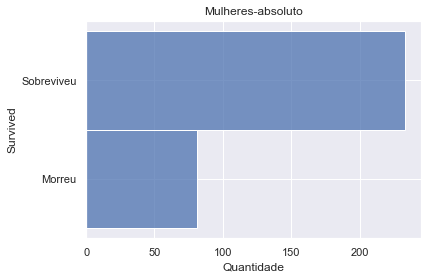

In [227]:
# Titanic Analise dos homens e mulheres
sns.histplot(titanic.query('Sex == "male"'), y = titanic.query('Sex == "male"')['Survived'].map({1 : 'Sobreviveu', 0: 'Morreu'})).set(title = 'Homens-absoluto', xlabel = 'Quantidade')
plt.show()

sns.histplot(titanic.query('Sex == "female"'), y = titanic.query('Sex == "female"')['Survived'].map({1 : 'Sobreviveu', 0: 'Morreu'})).set(title = 'Mulheres-absoluto', xlabel = 'Quantidade')
plt.show()

,Morreu,Sobreviveu
Sex,,
female,81,233
male,468,109


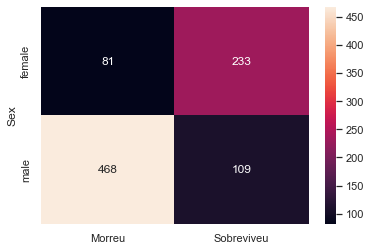

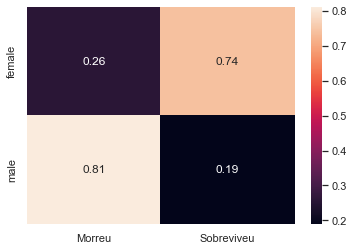

In [228]:
df_analise_morte = pd.crosstab(titanic['Sex'], titanic['Survived'])
df_analise_morte.columns = ['Morreu' , 'Sobreviveu']

display(df_analise_morte)

sns.heatmap(df_analise_morte, annot=True , fmt = '.0f')
plt.show()

meninas_mortas = df_analise_morte['Morreu'].loc['female'] / (df_analise_morte['Morreu'].loc['female'] + df_analise_morte['Sobreviveu'].loc['female'])
meninos_mortos = df_analise_morte['Morreu'].loc['male'] / (df_analise_morte['Morreu'].loc['male'] + df_analise_morte['Sobreviveu'].loc['male'])
meninas_vivas = df_analise_morte['Sobreviveu'].loc['female'] / (df_analise_morte['Morreu'].loc['female'] + df_analise_morte['Sobreviveu'].loc['female'])
meninos_vivos = df_analise_morte['Sobreviveu'].loc['male'] / (df_analise_morte['Morreu'].loc['male'] + df_analise_morte['Sobreviveu'].loc['male'])

df_relativo = pd.DataFrame(
    data = {'Morreu': [meninas_mortas, meninos_mortos], 
    'Sobreviveu': [meninas_vivas, meninos_vivos]},
    index = ['female', 'male'])

sns.heatmap(df_relativo, annot=True )
plt.show()


### Cabin x Survived x Fare x Pclass

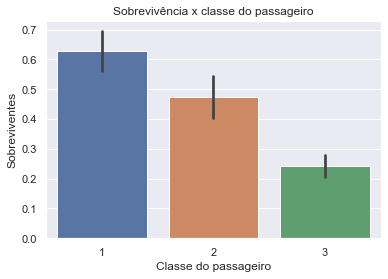

In [229]:
# Titanic Analise dos homens e mulheres
sns.barplot(x = df['Pclass'], y = df['Survived'])
plt.title('Sobrevivência x classe do passageiro')
plt.xlabel('Classe do passageiro')
plt.ylabel('Sobreviventes')
plt.show()

A partir do gráfico acima pode-se notar visualmente que a taxa de sobrevivência for maior para as classes menores 1 > 2 > 3

In [230]:
# Matriz de correlação entre os parâmetros
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex2
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.042939
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.131900
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.093254
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.114631
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.245489
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333
Sex2,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,1.000000


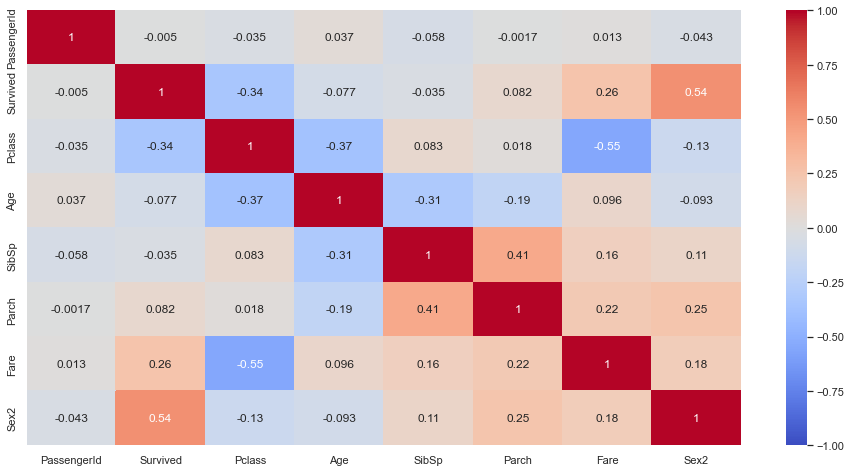

In [231]:
# Mapa de calor da matriz
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(),vmin = -1 , vmax = 1 , cmap='coolwarm',annot = True)
plt.show()

Visível correlação entre da varíavel'Suvived' com as variáveis 'Fare', 'Sex2' e 'PClass'.

### Buscando por correlações

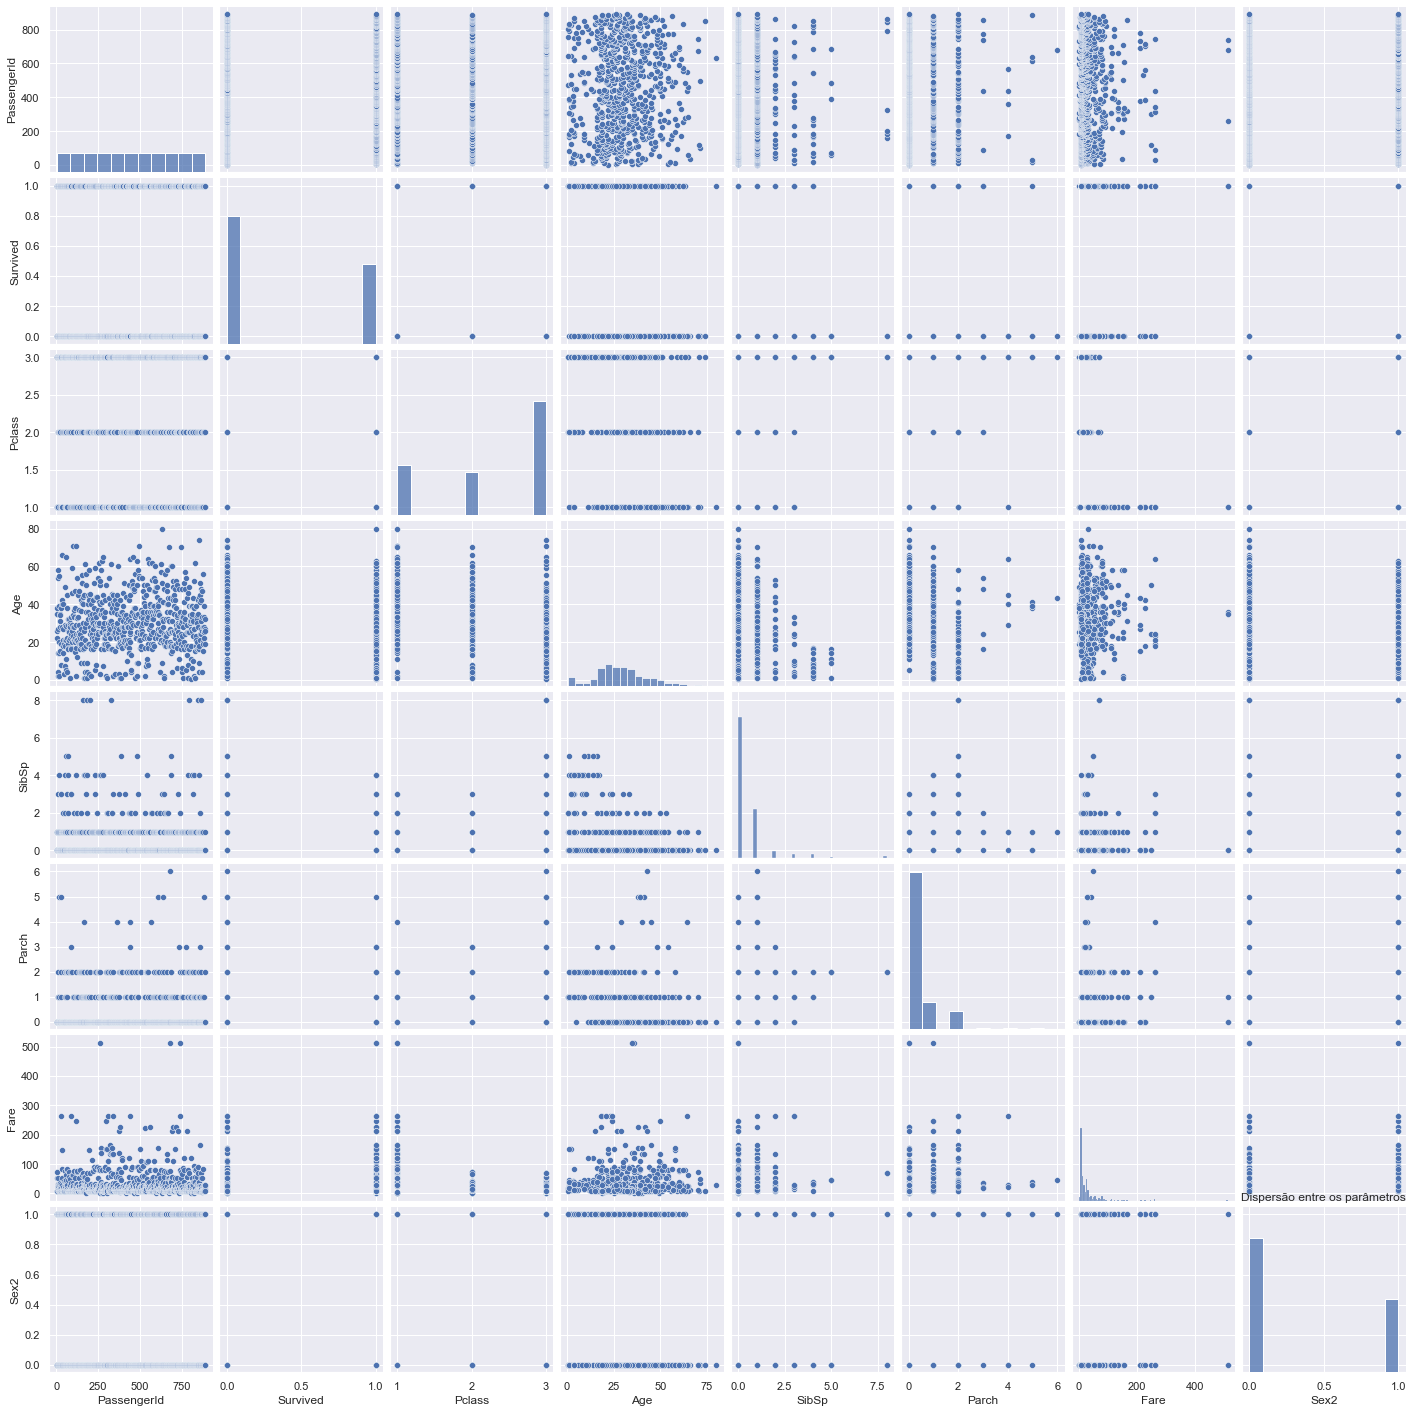

In [232]:
sns.pairplot(df)
plt.title('Dispersão entre os parâmetros')
plt.show()

Analisando os gráficos é poível notar que não há uma linha reta entre parâmetros, indicando que não há uma tendência linear entre eles. No entanto, notamos um padrão logístico binário entre eles, o que da faz crer que um modelo de regressão logistíca seria ideal para tentar relacionar as variáveis do Dataset com a sobrevivência.

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Survived2    891 non-null    object 
 13  Class        891 non-null    object 
 14  Sex2         891 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 104.5+ KB


In [234]:
# Organizando o dataset para a regressão logistica
df['Age'].fillna(median_age, inplace = True)
df.dropna(axis = 0, subset = ['Embarked'],inplace = True)
df.drop('Cabin', axis = 1, inplace = True)


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
 11  Survived2    889 non-null    object 
 12  Class        889 non-null    object 
 13  Sex2         889 non-null    int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 104.2+ KB


In [236]:
# Entrada e saída
X = df[['Pclass', 'Age', 'Fare', 'Sex2']]
#X = df.drop('Survived', axis = 1)

y = df['Survived']

# Separando entre treino e validação
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=42)


# Modelo logistico
clf = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)

In [237]:
clf.coef_

array([[-9.58669437e-01, -3.13452615e-02,  2.06926197e-03,
         2.47080777e+00]])

In [238]:
clf.intercept_

array([1.61481607])

In [239]:
y_pred = clf.predict(X_train)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,

In [240]:
y_proba = clf.predict_proba(X_train)
y_proba

array([[0.09831365, 0.90168635],
       [0.38328168, 0.61671832],
       [0.87023564, 0.12976436],
       ...,
       [0.15762106, 0.84237894],
       [0.34921401, 0.65078599],
       [0.9070114 , 0.0929886 ]])

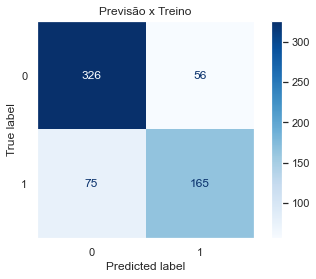

In [241]:
cm = confusion_matrix(y_train, y_pred)
cm_display = ConfusionMatrixDisplay(cm)

cm_display.plot(cmap = 'Blues')
plt.title('Previsão x Treino')
plt.grid(False)
plt.show()

### Métricas do Treino

In [242]:
# Acuracia
print(f'Acurácia: {accuracy_score(y_train, y_pred):.4f}')

precisao = precision_score(y_train, y_pred, average = 'weighted')
# Precisão
print(f'Precisão: {precisao:.4f}')

# Sensibilidade global do modelo
print(f'Sensibilidade: {recall_score(y_train, y_pred):.4f}')

Acurácia: 0.7894
Precisão: 0.7874
Sensibilidade: 0.6875


In [243]:
# Métricas para cada classe
print(classification_report(y_train , y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       382
           1       0.75      0.69      0.72       240

    accuracy                           0.79       622
   macro avg       0.78      0.77      0.77       622
weighted avg       0.79      0.79      0.79       622



In [244]:
auc = roc_auc_score(y_train, y_pred)
auc

0.7704515706806283

In [245]:
gini = 2 * auc - 1 
gini

0.5409031413612566

In [31]:
#

## Utilizando o modelo de árvore de decisão

In [254]:
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

# Entrada e saída
X = df[['Pclass', 'Sex2', 'Age', 'Fare']]

y = df['Survived']

# Separando entre treino e validação
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=42)

tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [255]:
y_proba = tree.predict_proba(X_train)[:, 1] # A probabilidade de ser 1
y_pred = tree.predict(X_train)

In [256]:
y_pred[:5]

array([1, 1, 0, 0, 0], dtype=int64)

In [257]:
y_train[:5]

486    1
293    0
173    0
450    0
361    0
Name: Survived, dtype: int64

In [258]:
accuracy_score(y_train, y_pred)

0.8215434083601286

In [259]:
precision_score(y_train, y_pred)

0.8115942028985508

In [260]:
# Acertando quem sobreviveu
recall_score(y_train, y_pred)

0.7

In [261]:
roc_auc_score(y_train, y_proba)

0.8670047993019196

In [262]:
confusion_matrix(y_train, y_pred)

array([[343,  39],
       [ 72, 168]], dtype=int64)

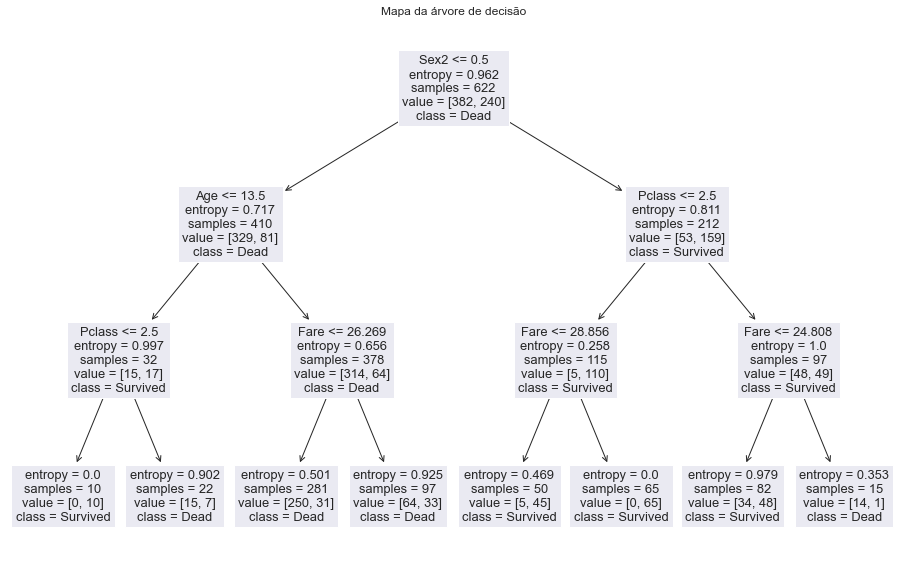

In [263]:
plt.figure(figsize = (16,10))
plot_tree(tree, feature_names = X.columns, class_names = ['Dead', 'Survived'])
plt.title('Mapa da árvore de decisão')
plt.show()

In [285]:
df_model = pd.get_dummies(df.drop(['Name', 'Sex2', 'Class', 'Survived2', 'Ticket','Embarked', 'Parch'], axis = 1))
df_model

,PassengerId,Survived,Pclass,Age,SibSp,Fare,Sex_female,Sex_male
0,1,0,3,22.0,1,7.2500,0,1
1,2,1,1,38.0,1,71.2833,1,0
2,3,1,3,26.0,0,7.9250,1,0
3,4,1,1,35.0,1,53.1000,1,0
4,5,0,3,35.0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,13.0000,0,1
887,888,1,1,19.0,0,30.0000,1,0
888,889,0,3,28.0,1,23.4500,1,0
889,890,1,1,26.0,0,30.0000,0,1


Acurácia: 0.8312
Precisão: 0.8140
Sensibilidade: 0.7292
AUC: 0.8789
Gini: 0.7577



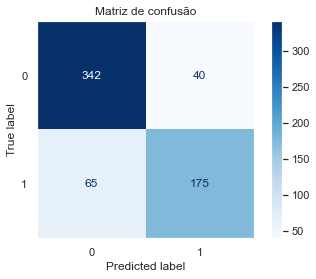

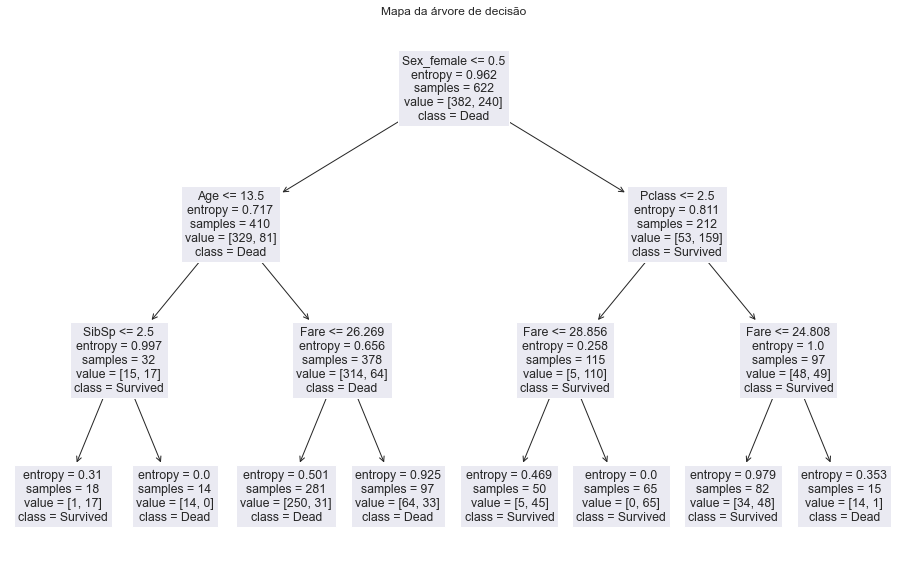

In [299]:
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3) # Testando 3 retornou o maior recall_score sem overfitting

# Entrada e saída
X = df_model.drop(['Survived', 'PassengerId', 'Sex_male'], axis = 1)

y = df_model['Survived']

# Separando entre treino e validação
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state = 42)

tree.fit(X_train, y_train)

# Predição
y_proba = tree.predict_proba(X_train)[:, 1] # A probabilidade de ser 1
y_pred = tree.predict(X_train)

# Acurácia
print(f'Acurácia: {accuracy_score(y_train, y_pred):.4f}')

# Precisão
print(f'Precisão: {precision_score(y_train, y_pred):.4f}')

# Acertando quem sobreviveu
print(f'Sensibilidade: {recall_score(y_train, y_pred):.4f}')

# ROC AUC
print(f'AUC: {roc_auc_score(y_train, y_proba):.4f}')
print(f'Gini: {roc_auc_score(y_train, y_proba) * 2 - 1:.4f}')

print()
# Matriz de confusão do modelo
cm = confusion_matrix(y_train, y_pred)
cm_display = ConfusionMatrixDisplay(cm)

cm_display.plot(cmap = 'Blues')
plt.title('Matriz de confusão')
plt.grid(False)
plt.show()

plt.figure(figsize = (16,10))
plot_tree(tree, feature_names = X.columns, class_names = ['Dead', 'Survived'])
plt.title('Mapa da árvore de decisão')
plt.show()

Dessa maneira, com uma taxa de acerto de 72,92% o algorítimo conseguirá dizer se o passageiro morreria ou sobreviveria ao acidente.

> Observação: Ainda em desenvolvimento... 

> Próximos passos: Análise das features, aprimoramento do modelo e definindo todos hiperparâmetros, buscando por alguma relação que melhore o recall_score